<a href="https://colab.research.google.com/github/Mayurdoiphode55/portfolio-optimization-drl/blob/main/Portfolio%20optimization%20and%20Asset%20allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install shimmy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.3/954.3 kB 15.4 MB/s eta 0:00:00


In [3]:
pip install numpy pandas gym stable-baselines3 matplotlib yfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 23.9 MB/s eta 0:00:00
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0a2
    Uninstalling gymnasium-1.0.0a2:
      Successfully uninstalled gymnasium-1.0.0a2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shimmy 2.0.0 requires gymnasium>=1.0.0a1, but you have gymnasium 0.29.1 which is incompatible.


In [4]:
import yfinance as yf
import numpy as np
import pandas as pd

# Define the tickers (assets in portfolio)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN']

# Fetch historical price data
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']
data = data.fillna(method="ffill")

# Calculate returns
returns = data.pct_change().dropna()


[*********************100%***********************]  5 of 5 completed
<ipython-input-4-89aef0e5495f>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


In [5]:
import gym
from gym import spaces

class PortfolioEnv(gym.Env):
    def __init__(self, returns):
        super(PortfolioEnv, self).__init__()
        self.returns = returns
        self.num_assets = returns.shape[1]
        self.action_space = spaces.Box(low=0, high=1, shape=(self.num_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.num_assets,), dtype=np.float32)
        self.initial_investment = 10000
        self.portfolio_value = self.initial_investment

    def step(self, action):
        weights = action / np.sum(action)  # Normalize weights to sum to 1
        portfolio_return = np.dot(self.returns.iloc[self.current_step], weights)
        self.portfolio_value *= (1 + portfolio_return)
        self.current_step += 1
        reward = self.portfolio_value
        done = self.current_step >= len(self.returns) - 1
        obs = self.returns.iloc[self.current_step]
        return obs, reward, done, {}

    def reset(self):
        self.current_step = 0
        self.portfolio_value = self.initial_investment
        return self.returns.iloc[self.current_step]

env = PortfolioEnv(returns)


In [8]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Wrap the environment for vectorized operations
vec_env = make_vec_env(lambda: env, n_envs=1)

# Define the PPO model
model = PPO("MlpPolicy", vec_env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)

# Save the model
model.save("ppo_portfolio_optimization")


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
<ipython-input-7-3163293004db>:15: RuntimeWarning: invalid value encountered in divide
  weights = action / np.sum(action)  # Normalize weights to sum to 1


Streaming output truncated to the last 5000 lines.
Portfolio Value: nan
Weights: [0.32771832 0.0537436  0.         0.16932067 0.44921744]
Portfolio Return: -0.005007336833895244
Portfolio Value: nan
Weights: [0.20830338 0.48320958 0.         0.         0.30848706]
Portfolio Return: -0.01361811362394951
Portfolio Value: nan
Weights: [0. 0. 0. 1. 0.]
Portfolio Return: -0.013321293581447846
Portfolio Value: nan
Weights: [0.         0.48087922 0.         0.5191208  0.        ]
Portfolio Return: 0.007526138915777824
Portfolio Value: nan
Weights: [0.         0.         0.         0.5625085  0.43749148]
Portfolio Return: 0.0007377451896091723
Portfolio Value: nan
Weights: [0.         0.         0.477323   0.04535407 0.477323  ]
Portfolio Return: -0.00036325031408381177
Portfolio Value: nan
Weights: [0. 0. 1. 0. 0.]
Portfolio Return: 0.03576892845320967
Portfolio Value: nan
Weights: [0.         0.47203857 0.         0.4551109  0.07285047]
Portfolio Return: 0.006212389615112232
Portfolio Value:

ValueError: Expected parameter loc (Tensor of shape (64, 5)) of distribution Normal(loc: torch.Size([64, 5]), scale: torch.Size([64, 5])) to satisfy the constraint Real(), but found invalid values:
tensor([[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]], grad_fn=<AddmmBackward0>)

In [11]:
import yfinance as yf
import numpy as np
import pandas as pd
import gym
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
import torch as th

# Define the tickers (assets in portfolio)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN']

# Fetch historical price data
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']
data = data.fillna(method="ffill")

# Calculate returns
returns = data.pct_change().dropna()

class PortfolioEnv(gym.Env):
    def __init__(self, returns):
        super(PortfolioEnv, self).__init__()
        self.returns = returns
        self.num_assets = returns.shape[1]
        self.action_space = spaces.Box(low=0, high=1, shape=(self.num_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.num_assets,), dtype=np.float32)
        self.initial_investment = 10000
        self.portfolio_value = self.initial_investment

    def step(self, action):
        if np.isnan(action).any():
            print("NaN in action!")
        # Clip actions to avoid numerical issues
        action = np.clip(action, 0.01, 0.99) # Added this line to prevent actions from being exactly 0 or 1,
                                              # which can cause issues with normalization and lead to NaNs
        weights = action / np.sum(action)  # Normalize weights to sum to 1
        portfolio_return = np.dot(self.returns.iloc[self.current_step], weights)
        self.portfolio_value *= (1 + portfolio_return)
        self.current_step += 1
        reward = self.portfolio_value
        if np.isnan(reward):
            print("NaN in reward!")
        done = self.current_step >= len(self.returns) - 1
        obs = self.returns.iloc[self.current_step]
        if np.isnan(obs).any():
            print("NaN in observations!")
        return obs, reward, done, {}

    def reset(self):
        self.current_step = 0
        self.portfolio_value = self.initial_investment
        return self.returns.iloc[self.current_step]

env = PortfolioEnv(returns)

# Wrap the environment for vectorized operations
vec_env = make_vec_env(lambda: env, n_envs=1)

# Define the PPO model
model = PPO("MlpPolicy", vec_env, verbose=1)

# Train the model and add a check for NaN in rewards
for i in range(10):
    model.learn(total_timesteps=1000, reset_num_timesteps=False)
    # Check for NaNs in the buffer
    if th.isnan(th.as_tensor(model.rollout_buffer.rewards)).any():
        print("NaN in reward buffer!")
        break

# Save the model
model.save("ppo_portfolio_optimization")

[*********************100%***********************]  5 of 5 completed
<ipython-input-11-a0ef7536967f>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 754      |
|    ep_rew_mean     | 1.84e+07 |
| time/              |          |
|    fps             | 1272     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 754      |
|    ep_rew_mean     | 1.58e+07 |
| time/              |          |
|    fps             | 1300     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 4096     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 754      |
|    ep_rew_mean     | 1.62e+07 |
| time/              |          |
|    fps             | 1315     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 6144    

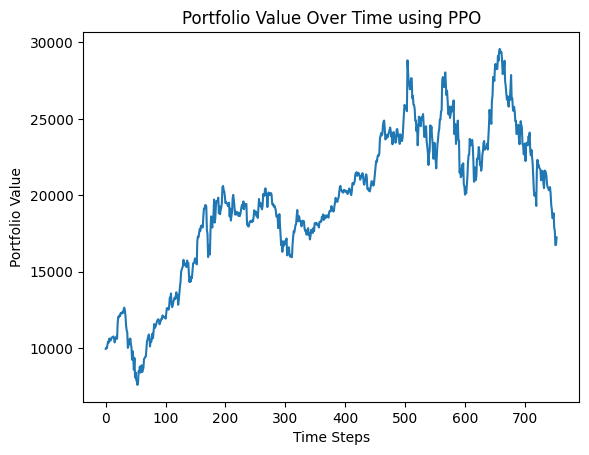

In [12]:
# Load the trained model
model = PPO.load("ppo_portfolio_optimization")

# Reset the environment
obs = env.reset()
portfolio_values = []

for _ in range(len(returns) - 1):
    action, _ = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    portfolio_values.append(env.portfolio_value)
    if done:
        break

# Plot the portfolio value over time
import matplotlib.pyplot as plt

plt.plot(portfolio_values)
plt.title('Portfolio Value Over Time using PPO')
plt.xlabel('Time Steps')
plt.ylabel('Portfolio Value')
plt.show()


In [13]:
import cvxpy as cp

# Define variables for optimization
weights = cp.Variable(len(tickers))
returns_mean = np.mean(returns, axis=0)
cov_matrix = np.cov(returns.T)

# Define objective: Maximize return and minimize risk
portfolio_return = weights.T @ returns_mean
portfolio_risk = cp.quad_form(weights, cov_matrix)
objective = cp.Maximize(portfolio_return - 0.5 * portfolio_risk)  # risk aversion factor

# Constraints
constraints = [cp.sum(weights) == 1, weights >= 0]

# Solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Print the optimal weights
optimal_weights = weights.value
print("Optimal Weights (Mean-Variance):", optimal_weights)


Optimal Weights (Mean-Variance): [7.81197603e-23 5.03070982e-23 5.00859042e-23 7.79692582e-23
 1.00000000e+00]
